In [1]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:

cartoon = cv2.imread("/content/cartoon.bmp")
cartoon_y = cv2.imread("/content/cartoon_y.jpg")
girl = cv2.imread("/content/girl.png") #grayscale image
girl_y = cv2.imread("/content/girl_y.jpg")
fingerprint = cv2.imread("/content/fingerprint.jpg")
fingerprint_y = cv2.imread("/content/fingerprint_y.jpg")

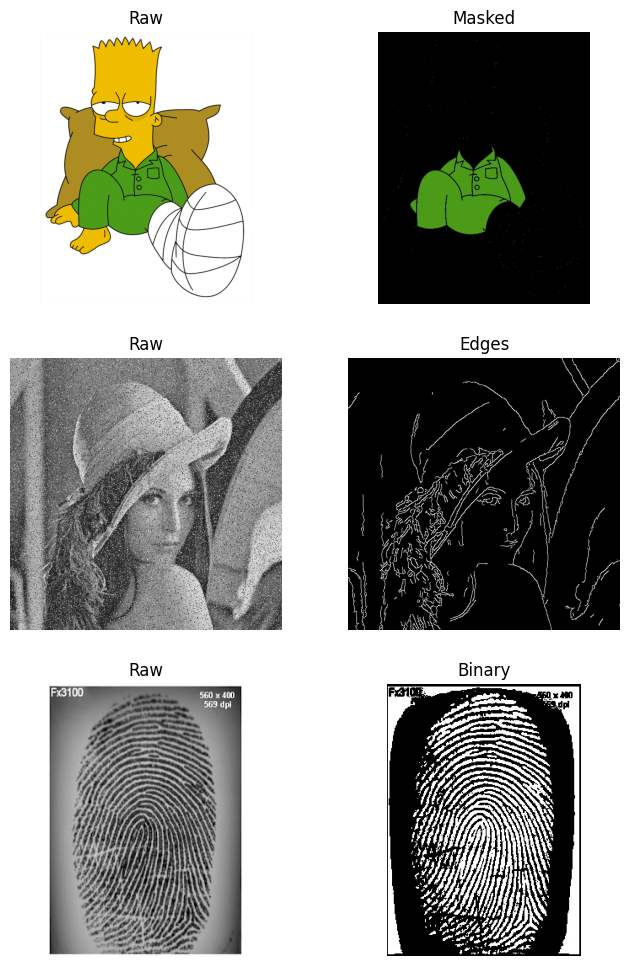

In [6]:

fig, axs = plt.subplots(3,2,figsize=(8,12))
axs[0,0].imshow(cv2.cvtColor(cartoon,cv2.COLOR_BGR2RGB))
axs[0,1].imshow(cartoon_y)
axs[0,0].axis("off")
axs[0,1].axis("off")
axs[0,0].set_title("Raw")
axs[0,1].set_title("Masked")
axs[1,0].imshow(girl)
axs[1,1].imshow(girl_y)
axs[1,0].axis("off")
axs[1,1].axis("off")
axs[1,0].set_title("Raw")
axs[1,1].set_title("Edges")
axs[2,0].imshow(cv2.cvtColor(fingerprint,cv2.COLOR_BGR2RGB))
axs[2,1].imshow(fingerprint_y)
axs[2,0].axis("off")
axs[2,1].axis("off")
axs[2,0].set_title("Raw")
axs[2,1].set_title("Binary")
plt.show()

Cartoon

In [69]:
#START CODE HERE (Do all your processing here)
hsv = cv2.cvtColor(cartoon, cv2.COLOR_BGR2HSV)

# Define range of green color in HSV
lower_green = np.array([40, 40, 40])   # Lower bound for green color
upper_green = np.array([80, 255, 255]) # Upper bound for green color

# Threshold the HSV image to get only green colors
mask = cv2.inRange(hsv, lower_green, upper_green)

# Bitwise-AND mask and original image
result = cv2.bitwise_and(cartoon, cartoon, mask=mask)
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

cartoon_y_mentee = result_rgb #(in RGB format only)

#END CODE HERE (the final processed image should be cartoon_y_mentee)

Girl

In [149]:
#START CODE HERE (Do all your processing here)

girl_gray = cv2.cvtColor(girl, cv2.COLOR_BGR2GRAY)
girl_blur = cv2.medianBlur(girl_gray, 3)
#girl_blur1 = cv2.GaussianBlur(girl_blur, (3,3),0)
girl_blur1 = cv2.GaussianBlur(girl_blur, (3,3),1)
girl1 = cv2.Canny(girl_blur1, 100,170)
girl2 =cv2.erode(girl1, np.ones((1,1),dtype = np.uint8))
kernel = np.ones((1, 1), np.uint8)


girl_y_mentee = girl2
#cv2.Canny(girl_blur, 150,200)
#cv2.erode(girl_gray, np.ones((3,3),dtype = np.uint8))
#cv2.dilate(girl1, np.ones((5,5),dtype = np.uint8))


#END CODE HERE (the final processed image should be girl_y_mentee)

Fingerprint



In [50]:
#START CODE HERE (Do all your processing here)


ret,thresh = cv2.threshold(fingerprint, 105,255, cv2.THRESH_BINARY_INV)

fingerprint_y_mentee = thresh #(in Binary format only i.e. pixel intensity = 0 or 255)

#END CODE HERE (the final processed image should be fingerprint_y_mentee)

Comparision

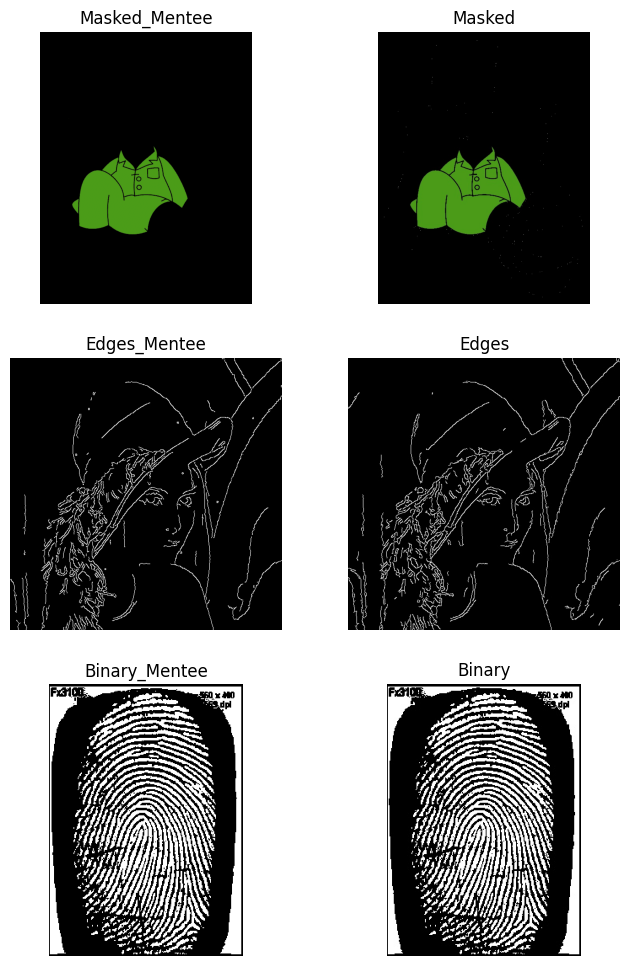

In [150]:

fig, axs1 = plt.subplots(3,2,figsize=(8,12))
axs1[0,0].imshow(cartoon_y_mentee)
axs1[0,1].imshow(cartoon_y)
axs1[0,0].axis("off")
axs1[0,1].axis("off")
axs1[0,0].set_title("Masked_Mentee")
axs1[0,1].set_title("Masked")
axs1[1,0].imshow(girl_y_mentee,cmap="gray")
axs1[1,1].imshow(girl_y)
axs1[1,0].axis("off")
axs1[1,1].axis("off")
axs1[1,0].set_title("Edges_Mentee")
axs1[1,1].set_title("Edges")
axs1[2,0].imshow(fingerprint_y_mentee,cmap="gray")
axs1[2,1].imshow(fingerprint_y)
axs1[2,0].axis("off")
axs1[2,1].axis("off")
axs1[2,0].set_title("Binary_Mentee")
axs1[2,1].set_title("Binary")
plt.show()